# Collinear interferometric detection, 3 pulses

This demonstrates the validity of the interferometric detection of 3rd order signals in the collinear geometry using the 32 step phase cycling scheme presented in [!!! ref].

In [29]:
from __future__ import division, print_function
from itertools import product, chain
import sympy as sy
import numpy as np
from sig2d.signals import e_field, signals_for_order, phase_cycle, weights
from sig2d.filters import collinear, filter_terms, contains_filter

In [5]:
sy.init_printing()#fontsize="12pt")

# Generate signal fields.

Collect up to third order with 3 pulses.

In [6]:
sigs = sum(signals_for_order(i, 3, filters=collinear) for i in [1,2,3])
# TODO: we have both \chi_-k3 and \chi_k3. Only one of these should survive!
sigs

In [7]:
len(sigs.args)

In [8]:
detected = sigs+sum([e_field(i) for i in [1,2,3]])
detected = sy.expand(sy.conjugate(detected)*detected)
print("Total nb. terms: ", len(detected.args))
detected = filter_terms(contains_filter("E_"), detected)
# by convention, drop all which contain complex conjuate of response
#detected = filter_terms(lambda e: r"conjugate(\chi" not in repr(e),
#                        detected)
print("Filtered:", len(detected.args))

Total nb. terms:  1296
Filtered: 207


Yes, this expansion had 1296 terms. After neglecting terms where no exciting fields show up, we still have an untractable number of terms.

# 4x4x1 phase cycling

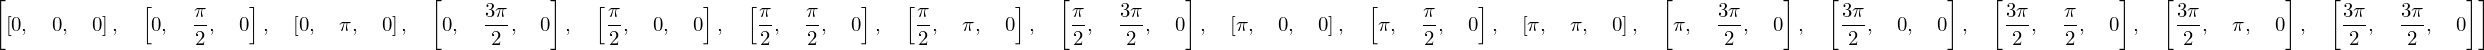

In [9]:
phases = []
for i, j in product(range(4), range(4)):
    phases.append([i*sy.pi/2, j*sy.pi/2, 0])
phases

In [10]:
alpha_r = (-1, 1, 1)
w_r = weights(alpha_r, phases)
cycled = phase_cycle(detected, phases, w_r)
len(cycled.args) # we still have way too many elements to cope with

In [11]:
cycled

As you can see, we have 20 surviving signals and the $E_1\overline{E_2}$ interferogram.

# 4x4x1 with chopping of third pulse

Apply our previous phase cycling, expanding norms as $a_i$. We can see that our term of interest scales with $a_3$. We should be able to remove all the other contributions using chopping of the third pulse.

In [13]:
cycled = phase_cycle(detected, phases, w_r, expand_norms=True)
cycled

In [22]:
filter_terms(contains_filter("a_3"), cycled)

In [37]:
phases = []
norms = []
for i, j in product(range(4), range(4)):
    for a in [1, 0]:
        phases.append([i*sy.pi/2, j*sy.pi/2, 0]) # we will end up with duplicates
        norms.append([1, 1, a])
# interleave w_r, -w_r
w_chop = []
for w in w_r:
    w_chop.append(w)
    w_chop.append(-w)
#w_chop = list(chain(*zip(w_r, [-1*w for w in w_r]))# in one line
phase_cycle(detected, phases, w_chop, norms)

This contains the rephasing and non-rephasing signals, as well as correlation spectra from pulse pairs. These can be separated using other techniques. This should be manageable, now that there are 6 of them.

### NR

In [40]:
alpha_nr = (1, -1, 1)
phases = []
for i, j in product(range(4), range(4)):
    phases.append([i*sy.pi/2, j*sy.pi/2, 0])
w_nr = weights(alpha_nr, phases)

phases = []
norms = []
for i, j in product(range(4), range(4)):
    for a in [1, 0]:
        phases.append([i*sy.pi/2, j*sy.pi/2, 0]) # we will end up with duplicates
        norms.append([1, 1, a])
# interleave w_r, -w_r
w_chop = []
for w in w_nr:
    w_chop.append(w)
    w_chop.append(-w)

cycled = phase_cycle(detected, phases, w_nr, norms)


In [44]:
sy.expand_complex(cycled).expand()